In [2]:
import os 
import shutil
import sys
sys.path.append('..')
from utils.objectCenter import df as objectCenter
from utils.pupil_utils import df as data

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from utils.data_utils import *

In [3]:
objectCenter.head()

,maskPath,videoPath,objectCenter
0,../video/Videos - mask/Sphere_init4_speed1/del...,../video/Sphere_init4_speed1/delta2/0001-0150.avi,"[(0.49142350111255684, 0.7936902210237617), (0..."
1,../video/Videos - mask/Sphere_init4_speed1/del...,../video/Sphere_init4_speed1/delta1/0001-0150.avi,"[(0.49142350111255684, 0.7936902210237617), (0..."
2,../video/Videos - mask/Sphere_init4_speed1/ori...,../video/Sphere_init4_speed1/original/0001-015...,"[(0.49142350111255684, 0.7936902210237617), (0..."
3,../video/Videos - mask/Sphere_init4_speed1_per...,../video/Sphere_init4_speed1_perturbation/delt...,"[(0.49142350111255684, 0.7936902210237617), (0..."
4,../video/Videos - mask/Sphere_init4_speed1_per...,../video/Sphere_init4_speed1_perturbation/delt...,"[(0.49142350111255684, 0.7936902210237617), (0..."


In [4]:
data.head()

,videos,participant,session,trial.started,trial.stopped,init,perturbation,delta,pos_x,pos_y,timestamps
0,../video/Sphere_init1_speed1/delta1/0001-0150.avi,188563,0,0.000000,6.333386,1,0,1,"[0.2927884583813753, 0.2920131246781436, 0.291...","[0.3272405972755005, 0.3280579570834274, 0.329...","[0.0, 0.004015499958768487, 0.0080329999909736..."
1,../video/Sphere_init1_speed1/delta2/0001-0150.avi,188563,0,7.450369,13.950540,1,0,2,"[0.3221923869596849, 0.4911111843027094, 0.297...","[0.4269767361632504, 0.2522769067476786, 0.335...","[7.456054999958724, 7.456080999982078, 7.46404..."
2,../video/Sphere_init2_speed1_perturbation/delt...,188563,0,15.066999,21.550252,2,1,2,"[0.3303922956368795, 0.3307511300507559, 0.331...","[0.1916913822992578, 0.1906563279423665, 0.191...","[15.068084999977145, 15.072042499901727, 15.07..."
3,../video/Sphere_init3_speed1/delta2/0001-0150.avi,188563,0,22.683611,29.166660,3,0,2,"[0.5856729326233265, 0.5865108178014103, 0.586...","[0.3165234793660445, 0.3187832786146326, 0.317...","[22.684120499994606, 22.68808449996868, 22.692..."
4,../video/Sphere_init2_speed1_perturbation/orig...,188563,0,30.300306,36.783160,2,1,0,"[0.2663852177642082, 0.1802998259758378, 0.299...","[0.067885146185584, -0.0466315406006683, 0.047...","[30.30809699994279, 30.308177999977488, 30.316..."


In [5]:
def filter_position(row):
    tx=row['pos_x']
    ty=row['pos_y']
    removed_data = 0
    for x , y in zip(tx,ty):
        if (x < 0.3 or x > 0.7) or (y < 0.5 or y > 0.9):
            print(x,y)
            removed_data +=1
            tx.remove(x)
            ty.remove(y)
    return row


# data = data.apply(filter_position,axis = 1)
data.head()

,videos,participant,session,trial.started,trial.stopped,init,perturbation,delta,pos_x,pos_y,timestamps
0,../video/Sphere_init1_speed1/delta1/0001-0150.avi,188563,0,0.000000,6.333386,1,0,1,"[0.2927884583813753, 0.2920131246781436, 0.291...","[0.3272405972755005, 0.3280579570834274, 0.329...","[0.0, 0.004015499958768487, 0.0080329999909736..."
1,../video/Sphere_init1_speed1/delta2/0001-0150.avi,188563,0,7.450369,13.950540,1,0,2,"[0.3221923869596849, 0.4911111843027094, 0.297...","[0.4269767361632504, 0.2522769067476786, 0.335...","[7.456054999958724, 7.456080999982078, 7.46404..."
2,../video/Sphere_init2_speed1_perturbation/delt...,188563,0,15.066999,21.550252,2,1,2,"[0.3303922956368795, 0.3307511300507559, 0.331...","[0.1916913822992578, 0.1906563279423665, 0.191...","[15.068084999977145, 15.072042499901727, 15.07..."
3,../video/Sphere_init3_speed1/delta2/0001-0150.avi,188563,0,22.683611,29.166660,3,0,2,"[0.5856729326233265, 0.5865108178014103, 0.586...","[0.3165234793660445, 0.3187832786146326, 0.317...","[22.684120499994606, 22.68808449996868, 22.692..."
4,../video/Sphere_init2_speed1_perturbation/orig...,188563,0,30.300306,36.783160,2,1,0,"[0.2663852177642082, 0.1802998259758378, 0.299...","[0.067885146185584, -0.0466315406006683, 0.047...","[30.30809699994279, 30.308177999977488, 30.316..."


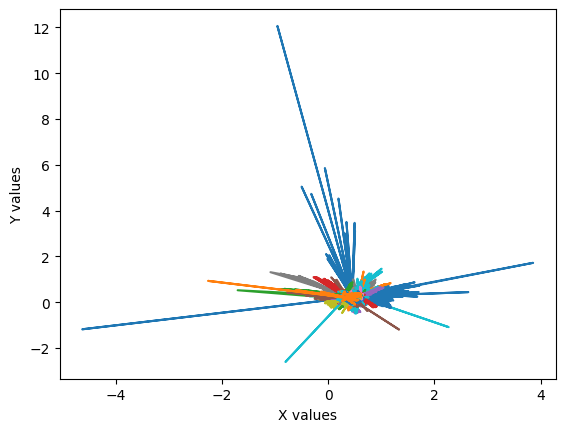

In [6]:
def createPlot(row):
    x = row.pos_x
    y = row.pos_y

    plt.plot(x,y)

data.apply(createPlot, axis = 1)        
plt.xlabel('X values')
plt.ylabel('Y values')
plt.show()

In [7]:
data["fixations"] = data.apply(lambda x : get_fixations(x),axis = 1)
data.head()

,videos,participant,session,trial.started,trial.stopped,init,perturbation,delta,pos_x,pos_y,timestamps,fixations
0,../video/Sphere_init1_speed1/delta1/0001-0150.avi,188563,0,0.000000,6.333386,1,0,1,"[0.2927884583813753, 0.2920131246781436, 0.291...","[0.3272405972755005, 0.3280579570834274, 0.329...","[0.0, 0.004015499958768487, 0.0080329999909736...","[[0.14750698094838666, 0.2782970619677346, 0.2..."
1,../video/Sphere_init1_speed1/delta2/0001-0150.avi,188563,0,7.450369,13.950540,1,0,2,"[0.3221923869596849, 0.4911111843027094, 0.297...","[0.4269767361632504, 0.2522769067476786, 0.335...","[7.456054999958724, 7.456080999982078, 7.46404...","[[0.08748299177273025, 0.2936608818435079, 0.0..."
2,../video/Sphere_init2_speed1_perturbation/delt...,188563,0,15.066999,21.550252,2,1,2,"[0.3303922956368795, 0.3307511300507559, 0.331...","[0.1916913822992578, 0.1906563279423665, 0.191...","[15.068084999977145, 15.072042499901727, 15.07...","[[0.03014449822305822, 0.8695652173913044, 0.4..."
3,../video/Sphere_init3_speed1/delta2/0001-0150.avi,188563,0,22.683611,29.166660,3,0,2,"[0.5856729326233265, 0.5865108178014103, 0.586...","[0.3165234793660445, 0.3187832786146326, 0.317...","[22.684120499994606, 22.68808449996868, 22.692...","[[0.758815577933787, 0.40411823739103225, 0.12..."
4,../video/Sphere_init2_speed1_perturbation/orig...,188563,0,30.300306,36.783160,2,1,0,"[0.2663852177642082, 0.1802998259758378, 0.299...","[0.067885146185584, -0.0466315406006683, 0.047...","[30.30809699994279, 30.308177999977488, 30.316...","[[0.08930287191666551, 0.47836217168507145, 0...."


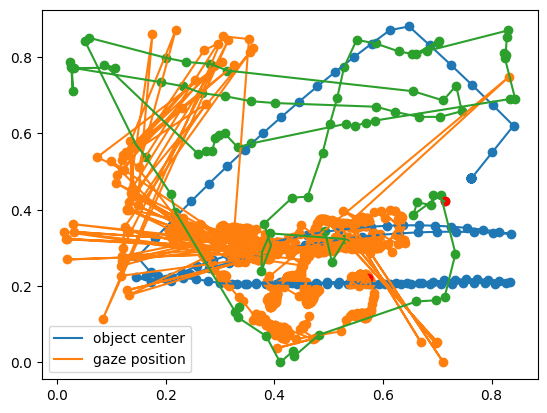

In [10]:
i = 10
df = data.iloc[i]
t = np.array(objectCenter[objectCenter['videoPath'] == df.videos]['objectCenter'].tolist())[0]
xo , yo = t[:,0] , t[:,1]
plt.scatter(xo,1-yo)
plt.plot(xo,1-yo, label = "object center")
xg , yg  = np.array(df.pos_x) , np.array(df.pos_y)
xmin = xg.min()
xmax = xg.max()
xg = (xg - xmin + 0.011) / ((xmax-xmin) *1.22 )

ymax = yg.min()
ymin = yg.max()
yg = (yg - ymin) / ((ymax-ymin) *1.15)
plt.scatter(xg,yg)
plt.scatter(xg[0],yg[0],color='red')
plt.plot(xg,yg , label= "gaze position")
plt.legend()
show_fixations(df)

In [71]:
data['dist'] = data.apply(lambda x : get_relative_distance_from_gravity_center(x),axis  = 1)
data.head(-1)

,videos,participant,session,trial.started,trial.stopped,init,perturbation,delta,pos_x,pos_y,timestamps,fixations,dist
0,../video/Sphere_init1_speed1/delta1/0001-0150.avi,188563,0,0.000000,6.333386,1,0,1,"[0.2927884583813753, 0.2920131246781436, 0.291...","[0.3272405972755005, 0.3280579570834274, 0.329...","[0.0, 0.004015499958768487, 0.0080329999909736...","[[0.14750698094838666, 0.2782970619677346, 0.2...","[0.0013460047136137807, 0.0013460047136137807,..."
1,../video/Sphere_init1_speed1/delta2/0001-0150.avi,188563,0,7.450369,13.950540,1,0,2,"[0.3221923869596849, 0.4911111843027094, 0.297...","[0.4269767361632504, 0.2522769067476786, 0.335...","[7.456054999958724, 7.456080999982078, 7.46404...","[[0.08748299177273025, 0.2936608818435079, 0.0...","[0.0056781069535199935, 0.0056781069535199935,..."
2,../video/Sphere_init2_speed1_perturbation/delt...,188563,0,15.066999,21.550252,2,1,2,"[0.3303922956368795, 0.3307511300507559, 0.331...","[0.1916913822992578, 0.1906563279423665, 0.191...","[15.068084999977145, 15.072042499901727, 15.07...","[[0.03014449822305822, 0.8695652173913044, 0.4...","[0.041753658405645246, 0.041753658405645246, 0..."
3,../video/Sphere_init3_speed1/delta2/0001-0150.avi,188563,0,22.683611,29.166660,3,0,2,"[0.5856729326233265, 0.5865108178014103, 0.586...","[0.3165234793660445, 0.3187832786146326, 0.317...","[22.684120499994606, 22.68808449996868, 22.692...","[[0.758815577933787, 0.40411823739103225, 0.12...","[0.012940184412704775, 0.012940184412704775, 0..."
4,../video/Sphere_init2_speed1_perturbation/orig...,188563,0,30.300306,36.783160,2,1,0,"[0.2663852177642082, 0.1802998259758378, 0.299...","[0.067885146185584, -0.0466315406006683, 0.047...","[30.30809699994279, 30.308177999977488, 30.316...","[[0.08930287191666551, 0.47836217168507145, 0....","[0.11648438254910812, 0.11648438254910812, 0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,../video/Sphere_init1_speed1_perturbation/delt...,188563,2,510.916258,517.399522,1,1,2,"[0.3019887427509365, 0.3021687059873018, 0.304...","[0.2665328689288549, 0.2666370202602631, 0.270...","[510.91640999994706, 510.9204614999471, 510.92...","[[0.08462008229304646, 0.45468132077269713, 0....","[0.048571924987253594, 0.048571012111681515, 0..."
69,../video/Sphere_init2_speed1_perturbation/delt...,188563,2,518.532922,525.016250,2,1,2,"[0.3267991973329064, 0.3269610581486216, 0.327...","[0.2248556104971536, 0.2240371818123665, 0.224...","[518.5364079999854, 518.5403914999915, 518.544...","[[0.046800669865636135, 0.5698159426817524, 0....","[0.08007685505193335, 0.08007685505193335, 0.0..."
70,../video/Sphere_init4_speed1/original/0001-015...,188563,2,526.149092,532.632803,4,0,0,"[0.443726087826996, 0.4437434797443061, 0.4437...","[0.198939064780186, 0.198915586728848, 0.19891...","[526.152529999963, 526.1564659999567, 526.1604...","[[0.37026788588272713, 0.49838038379524996, 0....","[0.10188658306564867, 0.10188658306564867, 0.1..."
71,../video/Sphere_init3_speed1_perturbation/delt...,188563,2,533.749647,540.249436,3,1,2,"[0.5773182577523277, 0.577041008647283, 0.5778...","[0.3241336949144892, 0.3234518200516659, 0.322...","[533.7525934999576, 533.7565274999943, 533.760...","[[0.7775678226456345, 0.506475526885698, 0.123...","[0.0003417771832440839, 0.0003417771832440839,..."


## Vizualisation for 1 participant for 1 session

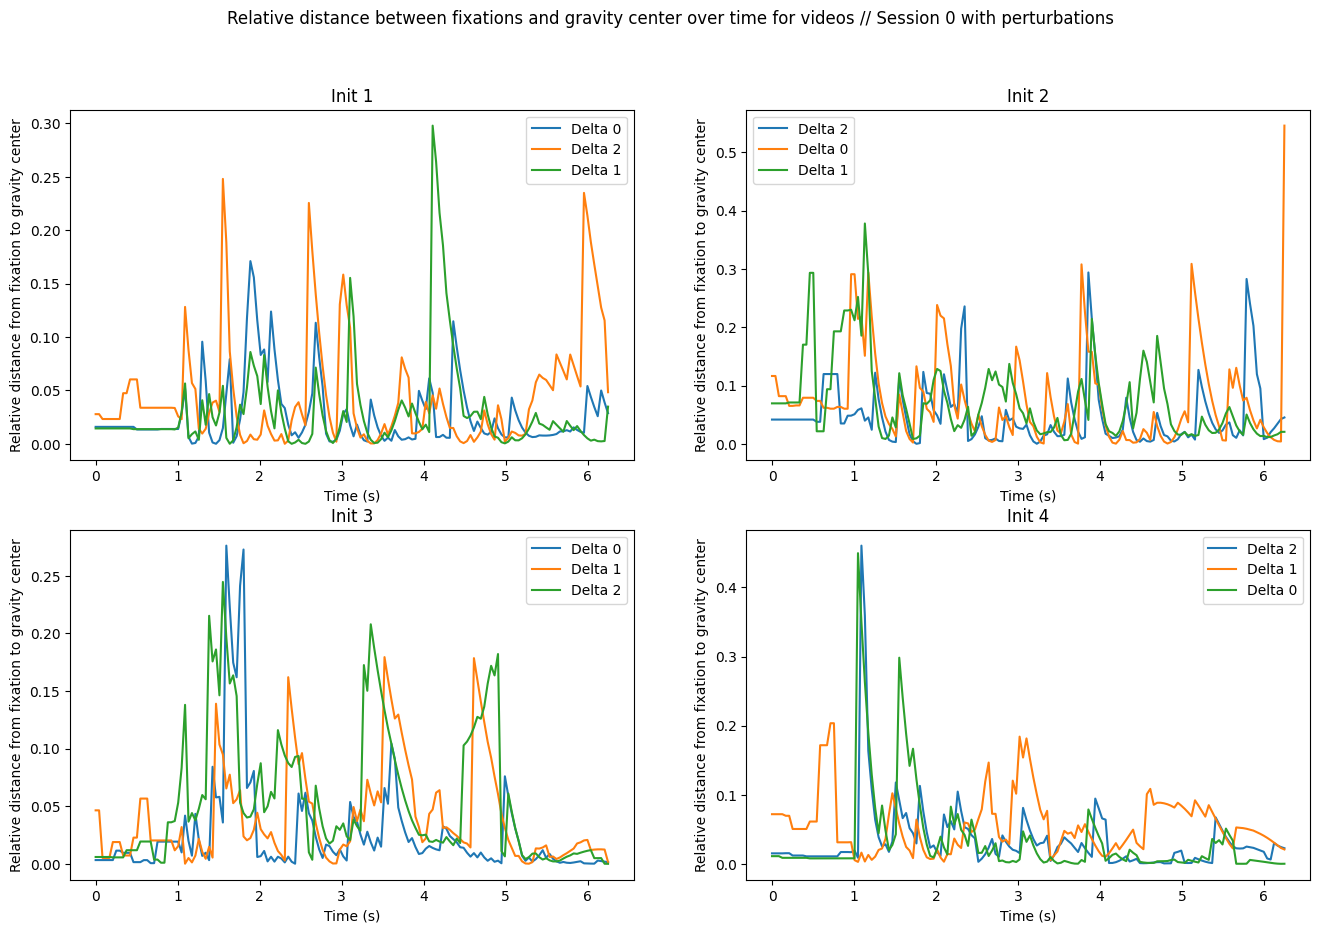

In [190]:
time = np.linspace(0,6.25,150)
i_session = 0
i_pert = 1

fig, axs = plt.subplots(2, 2 , figsize=(16,10))
fig.suptitle(f'Relative distance between fixations and gravity center over time for videos // Session {i_session} {"with perturbations" if i_pert else "without perturbations"}' )
plt.setp(axs[:, :], xlabel='Time (s)')
plt.setp(axs[:, :], ylabel='Relative distance from fixation to gravity center')



for i in range(0,4):
    df  = data[(data['init'] == i+1) & (data['perturbation'] == i_pert) & (data['session'] == i_session)]
    deltas  = df.delta
    ds  = df.dist
    for d , delta in zip(ds,deltas):
        axs[i//2,i%2].plot(d , label= f'Delta {delta}')
    axs[i//2,i%2].legend()
    axs[i//2,i%2].set_title(f"Init {i+1}")

plt.show()

In [213]:

# Group by participant, video, and session, and calculate the mean of 'dist'
mean_dist_per_index = data.groupby(['participant', 'init' , 'perturbation' , 'delta'])

df_mean = pd.DataFrame(columns=(['participant', 'init' , 'perturbation' , 'delta','mean']))
# Iterate over groups and display them
for name, group in mean_dist_per_index:

    dist_arrays = np.array(group['dist'].tolist())
    mean  = np.mean(dist_arrays, axis=0)
    combined = list(name) + [mean]

    row_df = pd.DataFrame([combined], columns=['participant', 'init', 'perturbation', 'delta','mean'])

# Concatenate the new DataFrame with the existing DataFrame
    df_mean = pd.concat([df_mean, row_df])

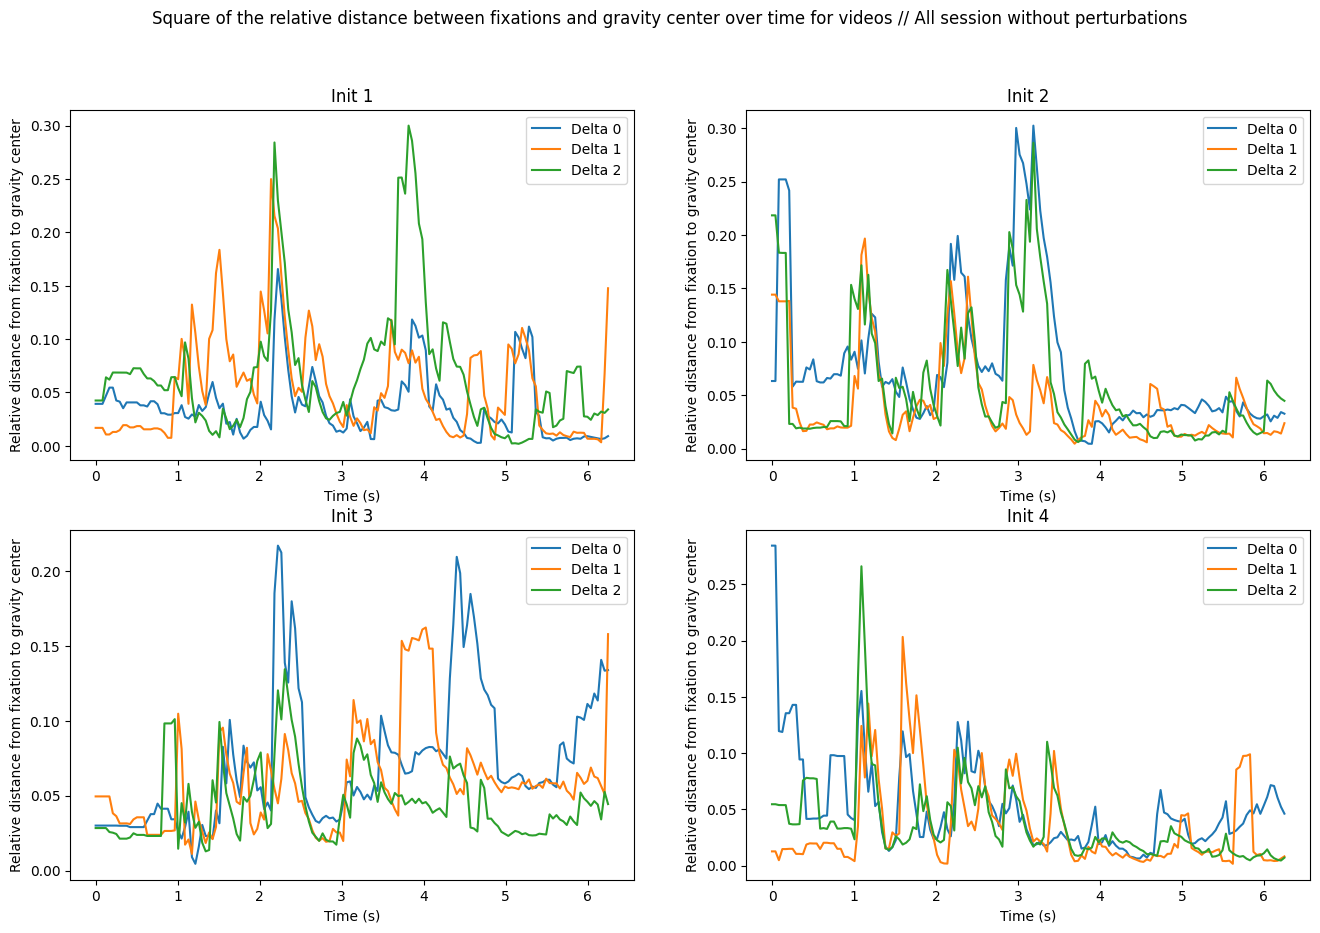

In [215]:
time = np.linspace(0,6.25,150)
i_session = 0
i_pert = 0

fig, axs = plt.subplots(2, 2 , figsize=(16,10))
fig.suptitle(f'Square of the relative distance between fixations and gravity center over time for videos // All session {"with perturbations" if i_pert else "without perturbations"}' )
plt.setp(axs[:, :], xlabel='Time (s)')
plt.setp(axs[:, :], ylabel='Relative distance from fixation to gravity center')

for i in range(0,4):
    df  = df_mean[(df_mean['init'] == i+1) & (df_mean['perturbation'] == i_pert)]
    deltas  = df.delta
    ds  = df['mean']
    for d , delta in zip(ds,deltas):
        axs[i//2,i%2].plot(time,d , label= f'Delta {delta}')
    axs[i//2,i%2].legend()
    axs[i//2,i%2].set_title(f"Init {i+1}")

plt.show()

## Vizualisation for 1 partcipant 1 video all session

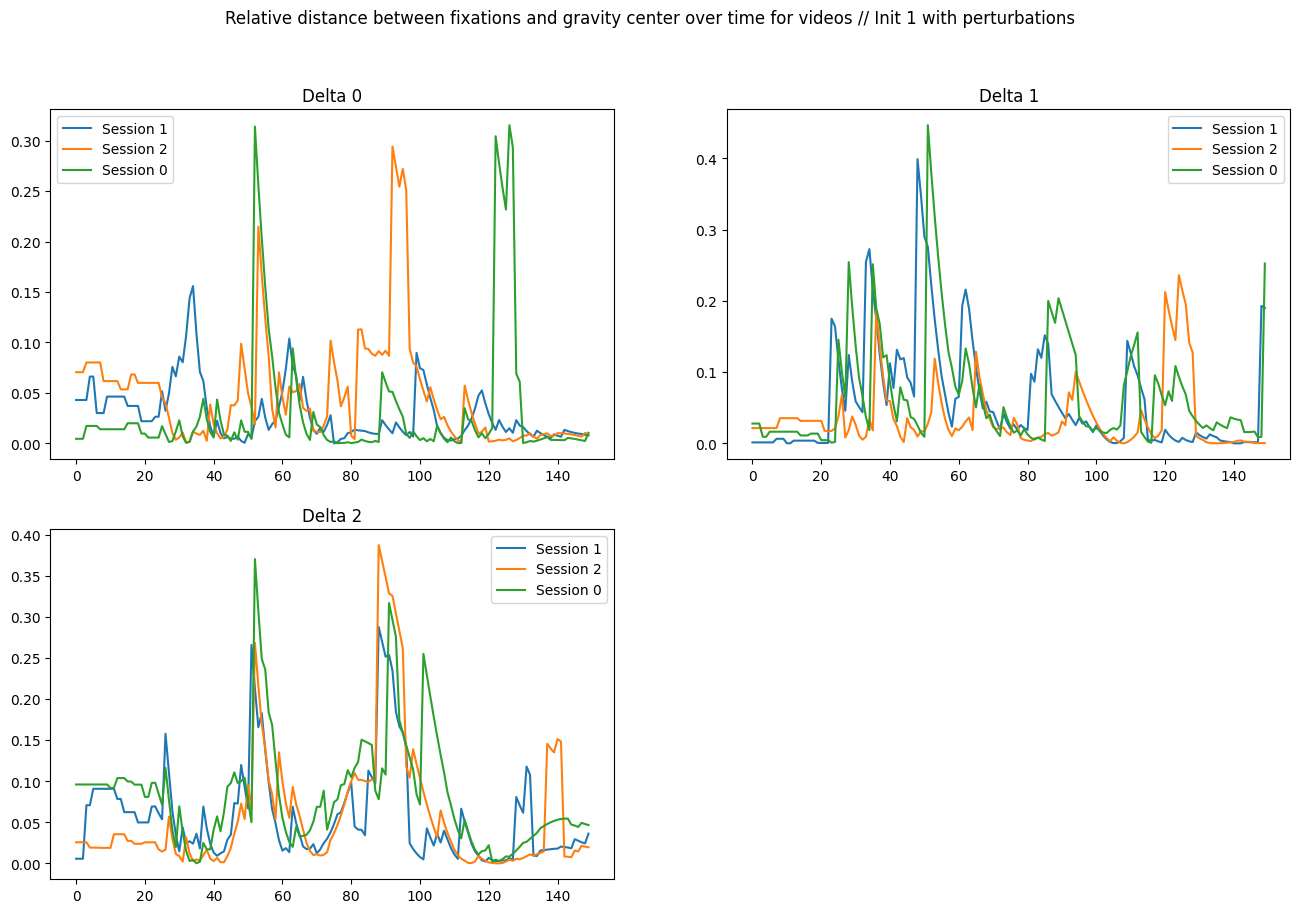

In [60]:
time = np.linspace(0,6.25,150)

i_init  = 1
i_pert = 1

fig, axs = plt.subplots(2, 2 , figsize=(16,10))
fig.suptitle(f'Relative distance between fixations and gravity center over time for videos // Init {i_init} {"with perturbations" if i_pert else "without perturbations"}' )
plt.setp(axs[:-2, :-2], xlabel='Time (s)')
plt.setp(axs[:-2, :-2], ylabel='Relative distance from fixation to gravity center')
fig.delaxes(axs[-1,-1])


for i in range(0,3):
    df  = data[(data['init'] == i_init) & (data['perturbation'] != i_pert) & (data.delta == i)]
    sessions  = df.session
    ds  = df.dist
    for d , delta in zip(ds,deltas):
        axs[i//2,i%2].plot(d , label= f'Session {delta}')
    axs[i//2,i%2].legend()
    axs[i//2,i%2].set_title(f"Delta {i}")

# plt.show()

In [62]:
d  = data.iloc[20]
make_video(d)

Video processing complete. Output video saved to: ../output_video.mp4
